In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib agg

import os
import jax
import jax.numpy as jnp
import visualization
from utils import results, experiments, settings
import global_settings

In [2]:
selection = "sinusoidal"

if selection == "sinusoidal":
    path = "/home/gw/data/experiments/paper/results/6414c528c5f8cc0c9f08578de5fb1dbc.tar.gz"
elif selection == "izmailov":
    path = "/home/gw/data/experiments/paper/results/74bac4f5529d37d7d94430b21e15b4ad.tar.gz"
elif selection == "regression2d":
    path = "/home/gw/data/experiments/paper/results/5f56ab5d599c544f57c6f5ca76d3e902.tar.gz"
else:
    pass

result = results.ResultSample.load_from_file(path)
experiment = experiments.FactoryExperiment(result.experiment_type, **{"settings": result.settings})()

In [11]:
print(experiment._dataset.data.shape)

(150, 2)


samples_parameters_fs.shape (1274, 10)


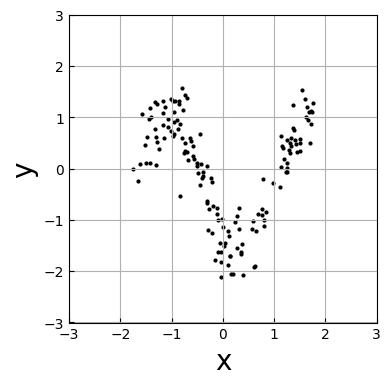

In [10]:
rng_key, rng_key_ = jax.random.split(jax.random.PRNGKey(0))
samples_parameters_fs = jax.random.permutation(rng_key_, result.samples["parameters"])
print("samples_parameters_fs.shape", samples_parameters_fs.shape)

n = 2**10
if len(experiment._dataset.conditional_indices) > 1:
    n = 2**4

figure = visualization.RegressionFigure(
    settings=settings.SettingsRegressionFigure(
        settings_plot=settings.SettingsPlot(
            alpha=0.08,
            epistemic=False
        ),
        label_size=20
    )
)
figure.plot(
    dataset=experiment._dataset,
    transformation=experiment._model_transformation.apply_from_vector,
    parameters_list=None,
    std=result.samples["std"].mean()
)

In [4]:
output_path = os.path.join(global_settings.PATH_THESIS, "figures")
name = "dataset_{}.pdf".format(selection)
figure._figure.savefig(os.path.join(output_path, name), dpi=300, transparent=True, bbox_inches="tight")